In [2]:
from hhsolver import *
import aspose.words as aw
from PIL import Image
from hhsampling import *

In [3]:
%load_ext autoreload


In [4]:
%autoreload 2

In [5]:
file_path = '../data/Candidatos20230803_n.txt'
data = collect_data(file_path=file_path).to_numpy()

lambdas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
nalloc = 50

sample_size = [60, 120, 180, 240] 

fileNames = []

# hhsamplingGA require transformed data
x = data @ inversecholcov(data)
solver = HHSolverPSO

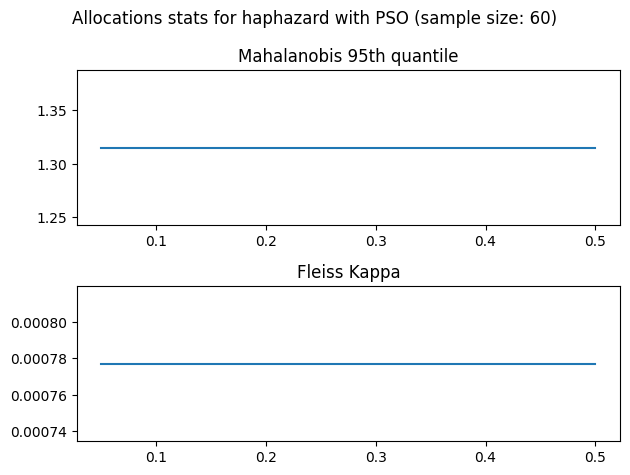

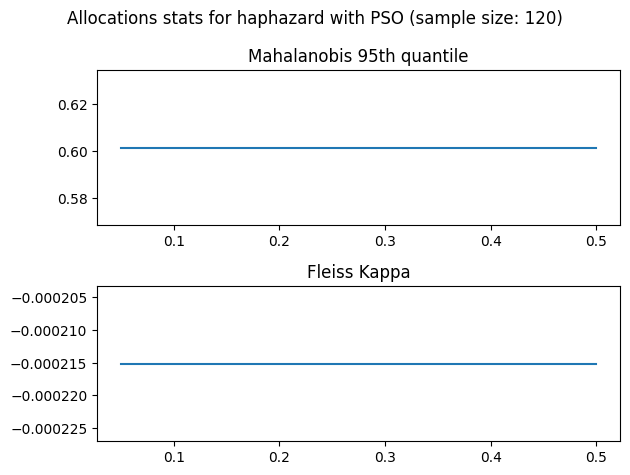

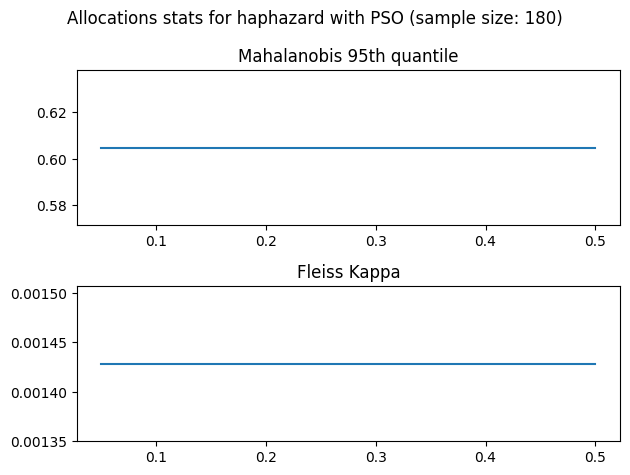

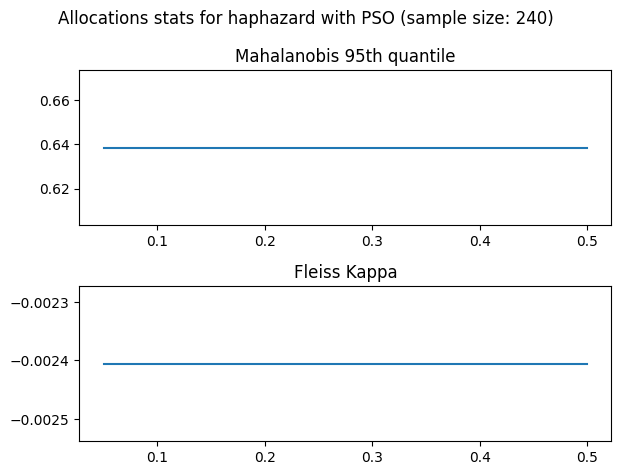

In [6]:
for sample in sample_size:
        # pre-generate noises used in each batch
        ma = 2
        noise = []
        populations = []
        for i in range(nalloc):
            z = generate_noise(x.shape[0], ma)
            # hhsamplingGA require transformed noise
            zt = z @ inversecholcov(z)
            noise.append(zt)
            populations.append(generate_pop(50, sample, x.shape[0]))

        stats_aux = {"distq95": [], "fkappa": []}

        for i in range(len(lambdas)):
            res = hhsampling(x, lambdas[i], nalloc, sample, noise, populations,solver)
            for k in stats_aux:
                stats_aux[k].append(res[k])

        stats = pd.DataFrame(stats_aux)

        # br = '-----------------------------'
        # print(br)
        # print(stats)
        # print(br)


        fig, axs = plt.subplots(2)
        fig.suptitle(f'Allocations stats for haphazard with PSO (sample size: {sample})')

        axs[0].plot(lambdas, stats["distq95"])
        axs[0].set_title("Mahalanobis 95th quantile")

        axs[1].plot(lambdas, stats["fkappa"])
        axs[1].set_title("Fleiss Kappa")

        fig.tight_layout()

        figname = str(sample) + ".png"
        fileNames.append("../output/img" + figname)
        plt.savefig("../output/img" + figname, format="png", bbox_inches="tight")
